# 1.1

In [1]:
import math

with open('input.txt', encoding='utf8') as f:
    content = f.readlines()

num = int(content[0].split(' = ')[1])
x = [float(i) for i in content[1].split(' ')]

print(num)


12200


In [2]:
import random

random.shuffle(x)


In [3]:
samples = [x]

samples_num = 10
for i in range(samples_num):
    start = int(i*num/10)
    end = int((i+1)*num/10)
    samples.append(x[start : end])


# 1.2

In [4]:
num_bins = 20


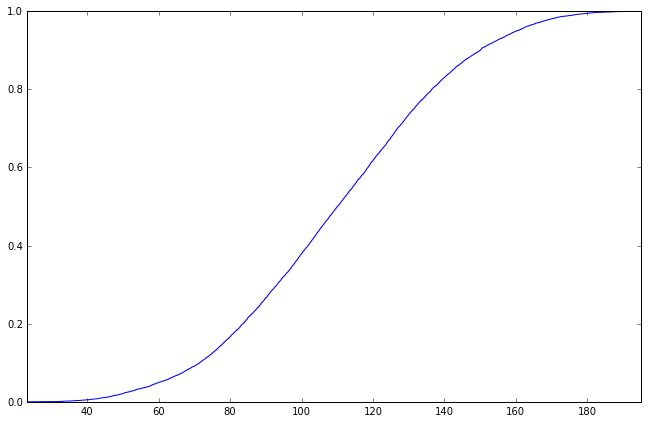

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

plt.figure(figsize=(11, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True)
plt.xlim([min(x), max(x)-1])
plt.show()


[   10.    55.   165.   277.   390.   627.   921.  1110.  1212.  1272.
  1233.  1271.  1102.   892.   648.   454.   330.   150.    63.    18.]


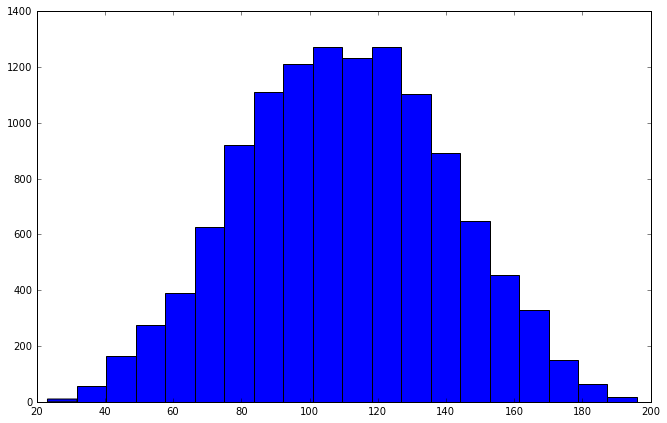

[   6.   10.   19.   32.   43.   56.   83.  101.   97.  118.  109.  104.
  118.   81.   91.   59.   45.   24.   19.    5.]


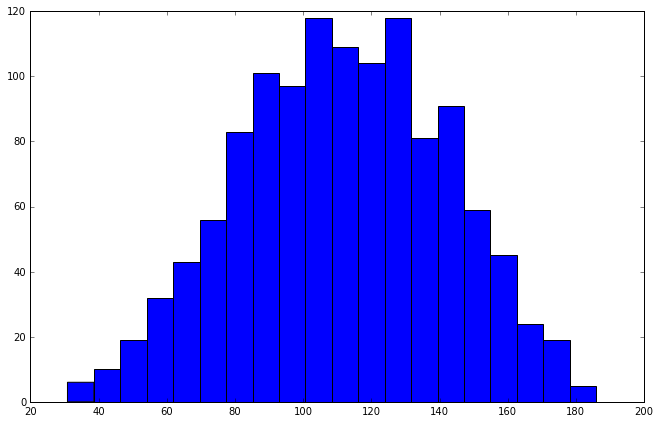

[  13.   23.   26.   39.   51.   84.   97.  131.  134.  112.   89.  106.
  100.   55.   60.   47.   23.   21.    5.    4.]


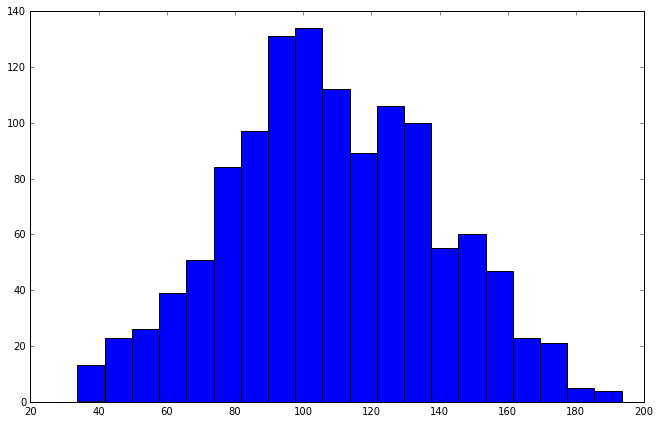

[   3.    7.   18.   33.   42.   68.   78.  105.  110.  103.  125.  122.
  111.   84.   78.   50.   42.   21.   10.   10.]


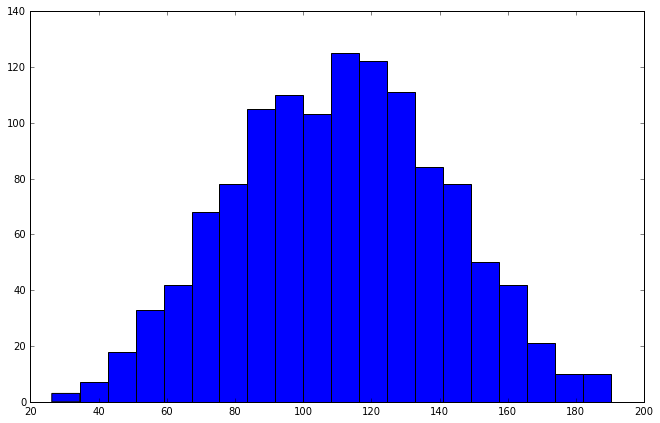

[   1.    8.   10.   33.   39.   58.   81.   92.  104.  138.  116.  121.
  115.  108.   78.   41.   38.   23.   13.    3.]


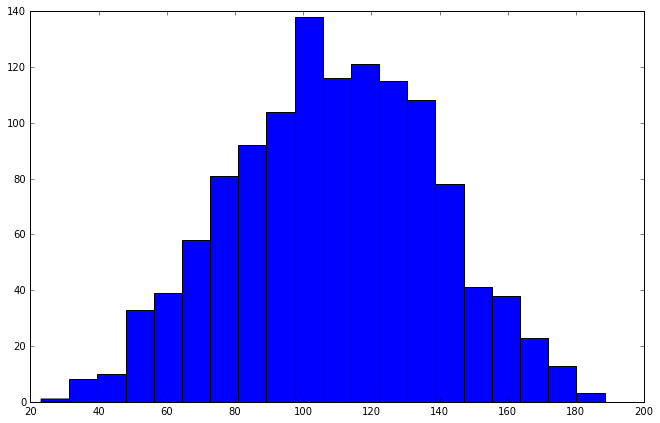

[   2.    9.   12.   35.   45.   70.  101.  122.  111.  115.  121.  113.
  110.   94.   64.   40.   30.   17.    6.    3.]


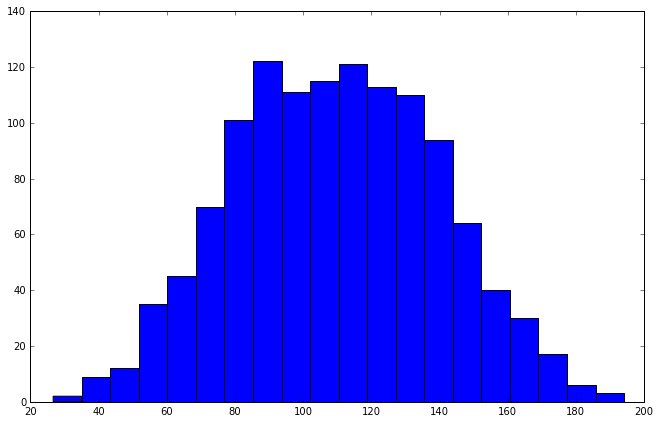

[  12.   19.   22.   38.   52.   75.  104.  129.  122.  143.  106.   93.
  101.   65.   64.   39.   21.    9.    4.    2.]


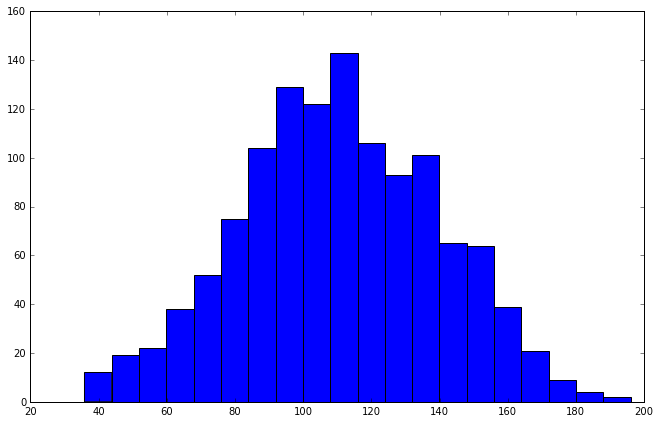

[   8.   14.   22.   22.   57.   85.   97.  111.  103.  117.  119.  126.
  104.   83.   47.   41.   37.   17.    9.    1.]


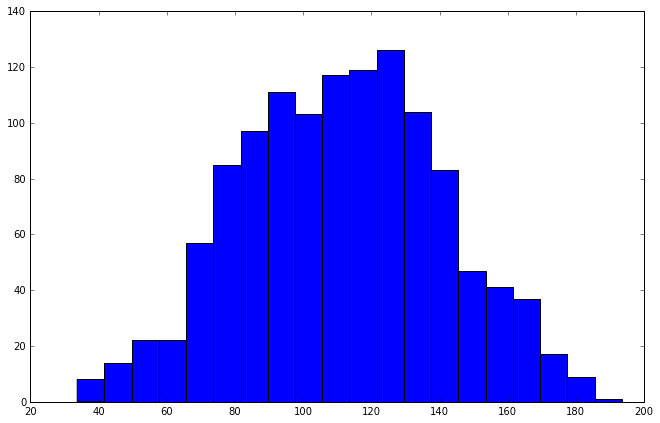

[   3.   10.   28.   20.   52.   62.   94.  109.  118.  120.  118.  126.
   97.   85.   60.   58.   35.   12.   11.    2.]


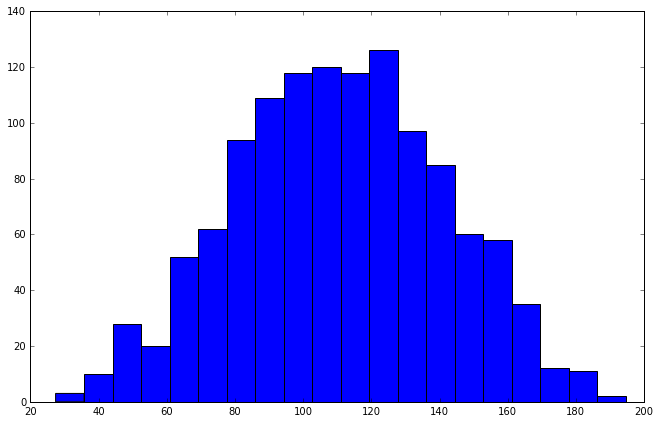

[   2.   16.   32.   36.   42.   84.  100.  102.  113.  116.  118.  112.
   95.   77.   73.   43.   30.   18.    7.    4.]


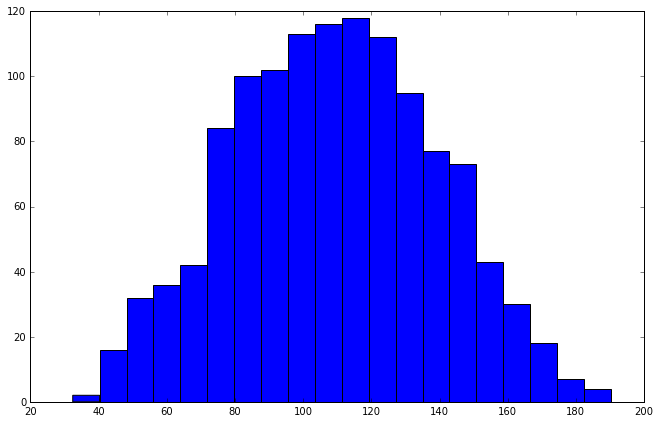

[   4.    6.   14.   23.   35.   70.   99.  101.   92.  113.  113.  134.
  127.   88.   68.   50.   33.   31.   12.    7.]


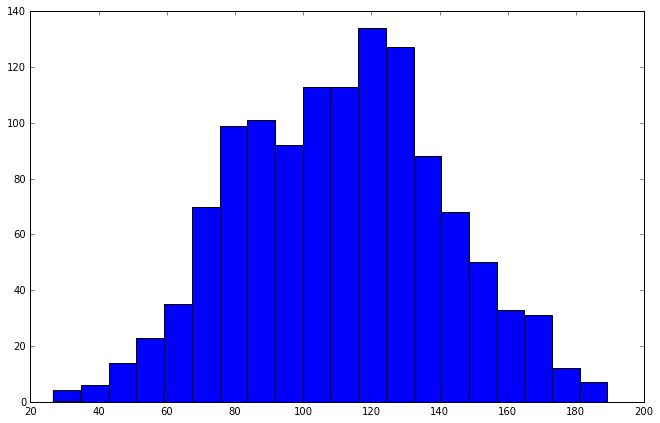

In [6]:
for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s, num_bins)
    print(n)
    plt.show()


# 1.3

In [7]:
def find_raw_moment(x: list, k: int):
    """Найти k-ый момент"""
    res = 0
    for i in x:
        res += i**k
    return res / len(x)

In [8]:
def find_central_moment(x: list, k: int):
    """Найти k-ый центральный момент"""
    mean = np.mean(x)
    res = 0
    for i in x:
        res += (i - mean)**k
    return res / len(x)

In [9]:
def find_mean(x: list):
    """Найти математическое ожидание"""
    return find_raw_moment(x, 1)

In [10]:
def find_variance(x: list):
    """Найти дисперсию"""
    return find_central_moment(x, 2)

In [11]:
import pandas as pd
import scipy.stats as st

d = {}

for i in range(len(samples)):
    s = samples[i]
    stat = {}
    stat[r'$\bar{x}$'] = st.tmean(s)
    stat[r'$x_{med}$'] = np.median(s)
    stat[r'$x_{mid}$'] = (min(s) + max(s)) / 2
    stat[r'$x_{mode}$'] = st.mode(s)[0][0]
    stat[r'$s^2$'] = np.var(s)
    stat[r'$s$'] = np.std(s)
    stat[r'$\hat{m}_3$'] = st.moment(s, 3)
    stat[r'$\hat{m}_4$'] = st.moment(s, 4)
    stat[r'$As$'] = st.skew(s)
    stat[r'$Ex$'] = st.kurtosis(s)
    d[i] = pd.Series(stat)


In [12]:
keys = [r'$\bar{x}$', r'$x_{med}$', r'$x_{mid}$', r'$x_{mode}$', r'$s^2$', r'$s$',
        r'$\hat{m}_3$', r'$\hat{m}_4$', r'$As$', r'$Ex$']

df = pd.DataFrame(d, index=keys).transpose()
df

,$\bar{x}$,$x_{med}$,$x_{mid}$,$x_{mode}$,$s^2$,$s$,$\hat{m}_3$,$\hat{m}_4$,$As$,$Ex$
0,110.146511,110.0465,109.59490,101.0970,902.224343,30.037050,89.286287,2.078277e+06,0.003295,-0.446862
1,111.377622,111.1375,108.42630,106.6400,908.177641,30.135986,-1975.406398,2.050572e+06,-0.072177,-0.513815
2,108.426229,106.2255,113.61800,80.9234,940.497842,30.667537,1884.828723,2.289938e+06,0.065348,-0.411143
3,110.412207,111.2455,108.24185,102.3580,943.742941,30.720399,111.271658,2.263533e+06,0.003838,-0.458563
4,108.850610,108.6375,105.77240,130.8790,895.558815,29.925889,-1150.151824,2.063042e+06,-0.042915,-0.427711
5,109.790271,109.1825,110.41905,100.6270,889.840183,29.830189,1209.691944,1.989329e+06,0.045573,-0.487636
6,110.651627,110.3625,115.95530,117.3890,842.783564,29.030735,-215.902305,1.873339e+06,-0.008824,-0.362550
7,111.306908,111.5455,113.59810,65.8664,878.272558,29.635664,-62.180146,1.971483e+06,-0.002389,-0.444156
8,110.588908,110.5540,110.98455,100.7780,934.273142,30.565882,-9.290205,2.242515e+06,-0.000325,-0.430861
9,109.142698,109.1650,111.34380,100.9270,881.910897,29.696985,483.288120,1.928217e+06,0.018453,-0.520829


In [13]:
df.columns = ['x_avg', 'x_med', 'x_mid', 'x_mode', 's^2', 's', 'm_3', 'm_4', 'As', 'Ex']
df.to_csv('table.csv')

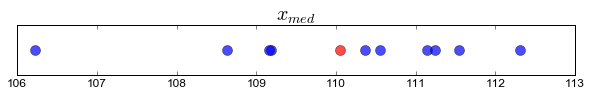

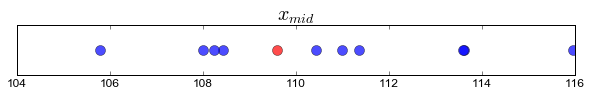

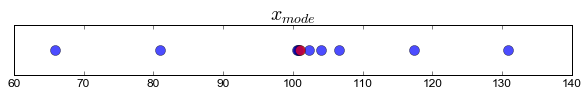

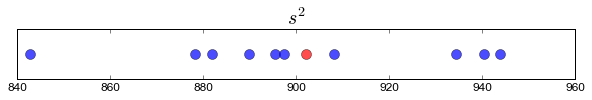

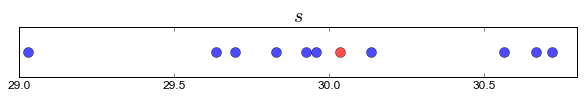

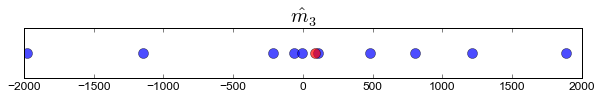

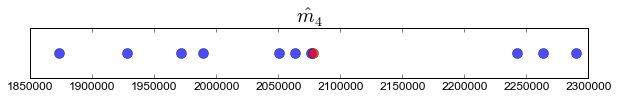

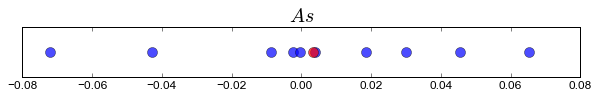

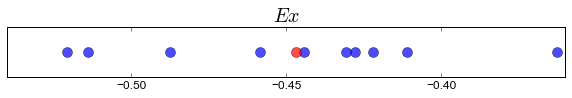

In [14]:
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

size = len(d) - 1

for i in range(1, len(keys)):
    key = keys[i]
    y = np.zeros(size)
    plt.figure(figsize=(10, 10.5))
    plt.subplot(len(keys), 1, i)
    plt.title(key, fontsize=20)
    plt.plot([d[i][key] for i in range(1, size + 1)], y, marker='o', linestyle='None', alpha=0.7, markersize=10)
    plt.plot(d[0][key], 0, marker='o', color='r', alpha=0.7, markersize=10)
    plt.yticks([])
    plt.xticks(fontsize=12)

plt.show()

In [15]:
print(np.percentile(samples[0], 2.5), end=' -- ')
print(np.percentile(samples[0], 97.5))

51.46851 -- 167.7943


Получили границы интерквантильного промежутка:
$$J_{0.95} \approx [51, 168]$$